<a href="https://colab.research.google.com/github/jesolisp/Fractional_Numerical_Methods/blob/main/01_Metodo_de_Euler_fraccionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo_pagina.png](logo_pagina.png "Cálculo fraccionario, difusión y +")

---

# Método de Euler fraccionario

Cuaderno elaborado por [Solís-Pérez J.E.](scholar.google.com.mx/citations?user=97DFBiYAAAAJ) y [Gómez-Aguilar J.F. ](scholar.google.com.mx/citations?user=WjFY9UwAAAAJ) a partir del método numérico mostrado por Li y Zeng (2015).
 
## Propósito
En este cuaderno vamos a presentar la implementación del método de Euler fraccionario hacia adelante en Python para la solución numérica a algunos problemas de valor inicial.

## Metodología
Dada una ecuación diferencial ordinaria fraccionaria de la forma

\begin{equation}
 \label{fode}
 {}^{*}_{0}\mathcal{D}_{t}^{\alpha}~ y(t) = f\left(t,y(t) \right), \quad m-1 < \alpha < m,
\end{equation}

con condiciones iniciales

\begin{equation}
 y^{j}(0) = y_{0}^{j}, \quad j = 0,1,\dots,n-1.
\end{equation}

Si tiene una solución única $f(t)$ y $f(t,y(t))$ satisface algunas condiciones suaves, entonces ${}^{*}_{0}\mathcal{D}_{t}^{\alpha}~ y(t)$ se puede aproximar por la fórmula rectangular fraccionaria izquierda en cada subintervalo $\left[ t_{k},t_{k+1} \right],~k=0,1,\dots,n-1$, *i.e.*,

\begin{equation}
 \left. y(t) \right|_{[t_{k},t_{k+1})} \approx \left. \tilde{y}(t) \right|_{[t_{k},t_{k+1})} = y(t_{k}),
\end{equation}

donde obtenemos

\begin{equation}
 \begin{aligned}
  \left. {}^{*}_{0}\mathcal{I}_{t}^{\alpha}~ y(t) \right|_{t = t_{n}} &= \frac{1}{\Gamma{(\alpha})} \sum_{k=0}^{n-1}\int_{t_{k}}^{t_{k+1}} \left( t_{n} - s \right)^{\alpha-1}f(s)\mathrm{d}s, \\
  & \approx \frac{1}{\Gamma{(\alpha})} \sum_{k=0}^{n-1}\int_{t_{k}}^{t_{k+1}} \left( t_{n} - s \right)^{\alpha-1}f(t_{k})\mathrm{d}s, \\
  & \approx \sum_{k=0}^{n-1} b_{n-k-1}f(t_{k}),
 \end{aligned}
\end{equation}

donde

\begin{equation}
 b_{k} = \frac{\Delta t^{\alpha}}{\Gamma(\alpha+1)} \left[ (k+1)^{\alpha} - k^{\alpha} \right].
\end{equation}

La solución a una EDO de la forma \eqref{fode}, se obtiene a partir del **método de Euler fraccionario hacia adelante** dado como sigue

\begin{equation}
 \label{ffem}
 y_{n+1} = \sum_{j=0}^{m-1} \frac{t_{n+1}^{j}}{j!}y_{0}^{(j)} + \Delta t^{\alpha} \sum_{j=0}^{n} b_{j,n+1} f\left(t_{j},y_{j}\right),
\end{equation}

donde 

\begin{equation}
 b_{j,n+1} = \frac{1}{\Gamma(\alpha+1)} \left[ \left( n - j + 1 \right)^{\alpha} - \left( n-j \right)^{\alpha} \right].
\end{equation}

**Nota.** Si $\alpha = 1$, el método \eqref{ffem} se reduce al método clásico de Euler hacia adelante.

# Configuración

## Importación de librerías
En esta sección se importan todas las librerías necesarias para llevar a cabo la implementación del método de Euler fraccionario.

In [ ]:
# Librerias necesarias
import time # Cálculo de tiempo de cómputo
import math
import numpy as np # Manipulación de datos
from numba import jit, prange
import pandas as pd # Manipulación de datos

# Configuración de visualización
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 300
%matplotlib inline

## Importación de librerías locales
En esta sección importamos todas las librerías locales para mostrar los resultados numéricos a soluciones exactas de EDOs. Por ejemplo, la implementación en Python por Hinsen (2017) de la función de Mittag-Leffler generalizada.

In [ ]:
# Ruta de las librerias locales incluidas
import sys
sys.path.append('./utils')

# Librerías locales
from mittag_leffler import ml # Función de Mittag-Leffler generalizada

# Definición de funciones

In [ ]:
@jit(nopython=True)
def forward_Euler_method(y0, Delta_t, tfin, alpha):
    """Método de Euler fraccionario hacia adelante"""
    
    N = np.int64(np.ceil((tfin-Delta_t)/Delta_t)) # Número de puntos de la solución numérica
    t = Delta_t + np.arange(0,N+1)*Delta_t # Vector de tiempo
        
    # Variable declarada para reducir costo computacional y evitar que en cada iteración se vuelva a calcular un valor constante
    gamma_alpha = math.gamma(alpha + 1.0)
    
    # EDO fraccionaria
    gamma_five_alpha = math.gamma(5 - alpha) # Variable declarada para reducir costo computacional y evitar que en cada iteración se vuelva a calcular un valor constante
    f = lambda t, y : - y + (1/gamma_five_alpha)*np.power(t,4 - alpha)

    # Initial conditions
    y = np.zeros(N+1)
    y[0] = y0

    for n in prange(N):
        sum_bj = 0

        for j in prange(n+1):
            bj = np.power(n-j+1,alpha) - np.power(n-j,alpha) # Fórmula rectangular fraccionaria izquierda
            sum_bj = sum_bj + bj*f(t[j],y[j])
            
        y[n+1] = y[0] + np.power(Delta_t,alpha)*(1/gamma_alpha)*sum_bj

    return t, y

# Resultados numéricos
Para mostrar algunos resultados numéricos, utilizamos los ejemplos reportados por Li y Zeng (2015). El lenguaje de programación a utilizar para obtener soluciones aproximadas a ecuaciones diferenciales ordinarias fraccionarias es Python con Numba y Jit para optimizar el cálculo numérico.

## Ejemplo 1. Ecuación Diferencial Ordinaria No Lineal Fraccionaria
Considere la siguiente ecuación diferencial ordinaria fraccionaria no lineal

\begin{equation}
 {}^{*}_{0}\mathcal{D}_{t}^{\alpha}~ y(t) = -y(t) + \frac{t^{4-\alpha}}{\Gamma(5-\alpha)}, \quad 0 < \alpha < 1, t>0,
\end{equation}

cuya solución exacta está dada como sigue

\begin{equation}
 \label{sol_exacta_1}
 y(t) = t^{4} E_{\alpha,5}(-t^{\alpha}),
\end{equation}

donde

\begin{equation}
 E_{\alpha,\beta}(z) = \sum_{k=0}^{\infty} \frac{z^{k}}{\Gamma(\alpha k + \beta)},
\end{equation}

considerando las siguientes condiciones iniciales

\begin{equation*}
 y(0) = 0.
\end{equation*}

In [ ]:
y0 = 0 # Condición inicial del Ejemplo 1

tfin = 1.0 # Tiempo de simulación
Delta_t = 1/10 # Paso de integración

# Ordenes fraccionarios
alpha = 0.1

start_time = time.time()
t, y_num = forward_Euler_method(y0, Delta_t, tfin, alpha)
print("--- %s segundos ---" % (time.time() - start_time)) # Cálculo del tiempo de 

# Solución exacta
y_exacta = lambda t, alpha : np.power(t,4)*ml(-np.power(t,alpha),alpha,5)

error_absoluto = np.abs(y_exacta(t, alpha) - y_num)
ultimo_error = error_absoluto[-1]
ultimo_error

--- 1.2738664150238037 segundos ---


0.0041205273742641844

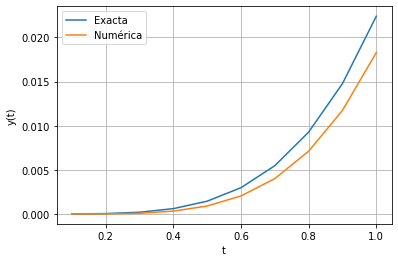

In [ ]:
plt.figure()
plt.plot(t,y_exacta(t,alpha), label = 'Exacta')
plt.plot(t,y_num, label = 'Numérica')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid('on')
plt.axis('tight')
plt.legend()
plt.show()

### Errores absolutos en $t=1$ para el Ejemplo 1

In [ ]:
def get_table(alpha, Delta_t):
    """Creación de la Tabla 3.4 de la página 111 del libro de Li y Zeng (2015)"""
    
    table = np.zeros( (len(Delta_t), len(alpha)) )

    for f in prange(len(Delta_t)):
        for c in prange(len(alpha)):
            t, y_num = forward_Euler_method(y0, 1/Delta_t[f], tfin, alpha[c])
            
            error_absoluto = np.abs(y_exacta(t, alpha[c]) - y_num)
            ultimo_error = error_absoluto[-1]
            table[f,c] = ultimo_error
            
    return table

In [ ]:
alpha = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
Delta_t = np.array([10, 20, 40, 80, 160, 320, 640])
    
pd.DataFrame(get_table(alpha, Delta_t), columns = alpha, index = Delta_t)

,0.1,0.3,0.5,0.7,0.9
10,0.004121,0.004140,0.004282,0.004557,0.004939
20,0.002019,0.001979,0.002051,0.002221,0.002455
40,0.000986,0.000946,0.000989,0.001089,0.001222
80,0.000481,0.000454,0.000480,0.000537,0.000609
160,0.000234,0.000219,0.000235,0.000266,0.000304
320,0.000114,0.000106,0.000116,0.000132,0.000152
640,0.000056,0.000052,0.000057,0.000066,0.000076


## Ejemplo 2. Sistema de Ecuaciones Diferenciales Ordinarias No Lineales Fraccionarias

El sistema de Lorenz es un sistema de ecuaciones diferenciales ordinarias propuesto por Edward Lorenz en 1963. Este sistema es también conocido como  atractor de Lorenz y suele asociarse con el *efecto mariposa*. Dicho modelo está dado como sigue

\begin{equation}
 \label{lorenz_cla}
 \begin{aligned}
  {}^{*}_{0}\mathcal{D}_{t}^{\alpha}~ x(t) &= \sigma(y(t) - x(t)), \\
  {}^{*}_{0}\mathcal{D}_{t}^{\alpha}~ y(t) &=x(t) (\rho - z(t)) - y(t), \\
  {}^{*}_{0}\mathcal{D}_{t}^{\alpha}~ z(t) &= x(t)y(t) - \beta z(t),
 \end{aligned}
\end{equation}

donde $x(t), y(t), z(t)$ representan los estados del sistema mientras que $\sigma,\rho,\beta\in\mathbb{R}$ son constantes.

La siguiente Figura muestra los sub espacios fase del atractor de Lorenz, considerando $\sigma = 10$, $\rho = 28$, $\beta = 8/3$, $\alpha = 1$; con condiciones iniciales $x(0)=y(0)=z(0) = 0.1$, paso de integración $\Delta t = 1e-2$ y un tiempo de simulación $t = 40$.

In [ ]:
# Parámetros del modelo
sigma = 10.0
rho = 28.0
beta = 8.0/3.0

param = np.array([sigma,rho,beta])

# Condiciones iniciales
ci = np.array([0.1,0.1,0.1])

# Parámetros del método numérico
h = 1e-2
tfin = 40

In [ ]:
def Euler_method(y0, Delta_t, tfin, param):
    """Método de Euler clásico hacia adelante"""
    
    N = np.int64(np.ceil((tfin-Delta_t)/Delta_t)) # Número de puntos de la solución numérica
    t = Delta_t + np.arange(0,N+1)*Delta_t # Vector de tiempo
        
    sigma = param[0]
    rho = param[1]
    beta = param[2]
    
    # EDO clásica
    f1 = lambda t, x, y, z : sigma*(y - x)
    f2 = lambda t, x, y, z : x*(rho - z) - y
    f3 = lambda t, x, y, z : x*y - beta*z

    # Condiciones iniciales
    x = np.zeros(N+1)
    x[0] = y0[0]
    
    y = np.zeros(N+1)
    y[0] = y0[1]
    
    z = np.zeros(N+1)
    z[0] = y0[2]
    
    for n in prange(N):
        x[n+1] = x[n] + f1(t[n],x[n],y[n],z[n])*h
        y[n+1] = y[n] + f2(t[n],x[n],y[n],z[n])*h
        z[n+1] = z[n] + f3(t[n],x[n],y[n],z[n])*h
        
    return t,x,y,z

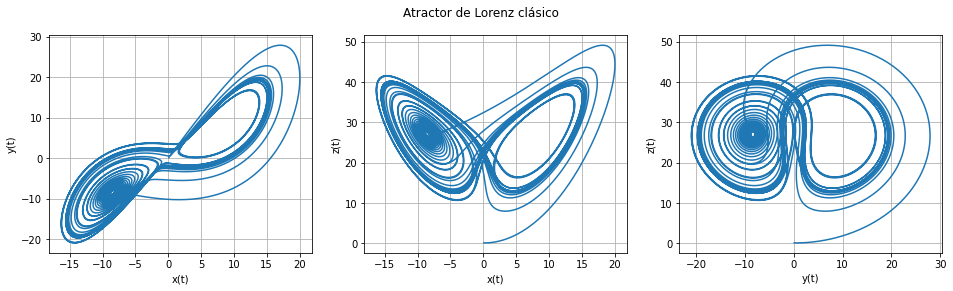

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.25))
fig.suptitle('Atractor de Lorenz clásico')

ax = fig.add_subplot(1, 3, 1)
ax.plot(xc,yc)
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.grid('on')

ax = fig.add_subplot(1, 3, 2)
ax.plot(xc,zc)
ax.set_xlabel('x(t)')
ax.set_ylabel('z(t)')
ax.grid('on')

ax = fig.add_subplot(1, 3, 3)
ax.plot(yc, zc)
ax.set_xlabel('y(t)')
ax.set_ylabel('z(t)')
ax.grid('on')

plt.show()

Aplicando el métod de Euler dado en la Ec.  \eqref{ffem} al atractor de Lorenz \eqref{lorenz_cla}, definimos la siguiente función. Donde $f_{1}$, $f_{2}$ y $f_{3}$ representan cada una de las ecuaciones diferenciales ordinarias.

In [ ]:
@jit(nopython=True)
def forward_Euler_method_EDO(x0, Delta_t, tfin, alpha, param):
    """Método de Euler fraccionario hacia adelante"""
    
    N = np.int64(np.ceil((tfin-Delta_t)/Delta_t)) # Número de puntos de la solución numérica
    t = Delta_t + np.arange(0,N+1)*Delta_t # Vector de tiempo
        
    # Variable declarada para reducir costo computacional y evitar que en cada iteración se vuelva a calcular un valor constante
    gamma_alpha = math.gamma(alpha + 1.0)
    
    sigma = param[0]
    rho = param[1]
    beta = param[2]
    
    # EDO fraccionaria
    f1 = lambda t, x, y, z : sigma*(y - x)
    f2 = lambda t, x, y, z : x*(rho - z) - y
    f3 = lambda t, x, y, z : x*y - beta*z

    # Condiciones iniciales
    x = np.zeros(N+1)
    x[0] = x0[0]
    
    y = np.zeros(N+1)
    y[0] = x0[1]
    
    z = np.zeros(N+1)
    z[0] = x0[2]

    for n in prange(N):
        sum_bj_x = 0
        sum_bj_y = 0
        sum_bj_z = 0

        for j in prange(n+1):
            bj = np.power(n-j+1,alpha) - np.power(n-j,alpha) # Fórmula rectangular fraccionaria izquierda
            sum_bj_x = sum_bj_x + bj*f1(t[j],x[j],y[j],z[j])
            sum_bj_y = sum_bj_y + bj*f2(t[j],x[j],y[j],z[j])
            sum_bj_z = sum_bj_z + bj*f3(t[j],x[j],y[j],z[j])
            
        x[n+1] = x[0] + np.power(Delta_t,alpha)*(1/gamma_alpha)*sum_bj_x
        y[n+1] = y[0] + np.power(Delta_t,alpha)*(1/gamma_alpha)*sum_bj_y
        z[n+1] = z[0] + np.power(Delta_t,alpha)*(1/gamma_alpha)*sum_bj_z

    return t, x, y, z

Considerando los mismos parámetros y condiciones iniciales, así como tiempo de simulación y paso te integración. Realizamos la llamada a la función anteriormente definida

In [ ]:
alpha = 1 # Conforme $\alpha \rightarrow 1$, se recupera el caso clásico

start_time = time.time()
t, x, y, z = forward_Euler_method_EDO(ci, h, tfin, alpha, param)
print("--- %s segundos ---" % (time.time() - start_time)) # Cálculo del tiempo de  cómputo para Euler fraccionario

start_time = time.time()
tc, xc, yc, zc = Euler_method(ci, h, tfin, param)
print("--- %s segundos ---" % (time.time() - start_time)) # Cálculo del tiempo de cómputo para Euler clásico

--- 27.582805156707764 segundos ---
--- 0.13194608688354492 segundos ---


Para analizar numéricamente la convergencia del método de Euler fraccionario, definimos el valor absoluto del error para graficarlo junto con las trayectorias del atractor de Lorens, *i.e.*

\begin{equation}
 e_{x}(t) = \text{abs}\left(x_{Ec}(t) - x_{Ef}(t) \right),
\end{equation}

\begin{equation}
 e_{y}(t) = \text{abs}\left(y_{Ec}(t) - y_{Ef}(t) \right),
\end{equation}

\begin{equation}
 e_{z}(t) = \text{abs}\left(z_{Ec}(t) - z_{Ef}(t) \right),
\end{equation}

donde ${}_{Ec}$ y ${}_{Ef}$ representan Euler clásico y Euler fraccionario, respectivamente.

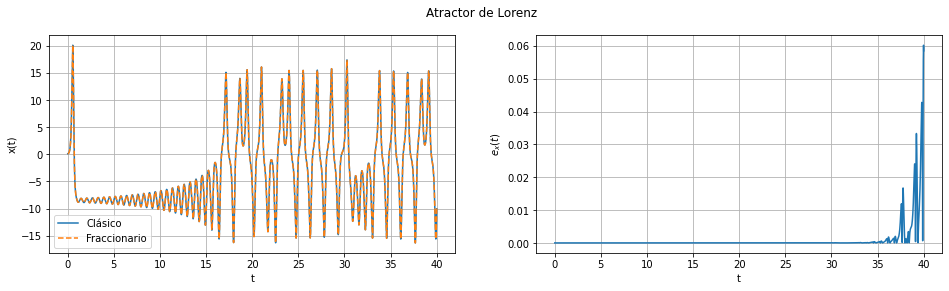

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.25))
fig.suptitle('Atractor de Lorenz')

ax = fig.add_subplot(1, 2, 1)
ax.plot(tc, xc, label = 'Clásico')
ax.plot(t, x, '--', label = 'Fraccionario')
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.legend()
ax.grid('on')

ax = fig.add_subplot(1, 2 , 2)
ax.plot(t,np.abs(xc-x))
ax.set_xlabel('t')
ax.set_ylabel('$e_{x}(t)$')
ax.grid('on')

plt.show()

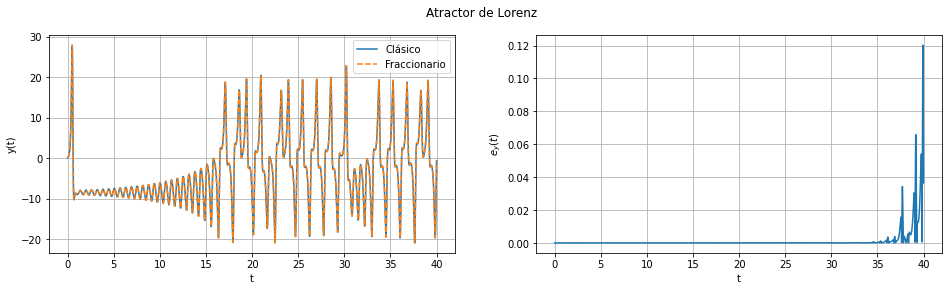

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.25))
fig.suptitle('Atractor de Lorenz')

ax = fig.add_subplot(1, 2, 1)
ax.plot(tc, yc, label = 'Clásico')
ax.plot(t, y, '--', label = 'Fraccionario')
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend()
ax.grid('on')

ax = fig.add_subplot(1, 2 , 2)
ax.plot(t,np.abs(yc-y))
ax.set_xlabel('t')
ax.set_ylabel('$e_{y}(t)$')
ax.grid('on')

plt.show()

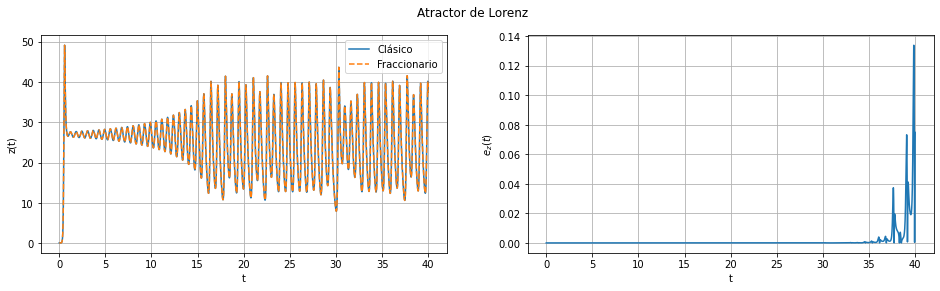

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.25))
fig.suptitle('Atractor de Lorenz')

ax = fig.add_subplot(1, 2, 1)
ax.plot(tc, zc, label = 'Clásico')
ax.plot(t, z, '--', label = 'Fraccionario')
ax.set_xlabel('t')
ax.set_ylabel('z(t)')
ax.legend()
ax.grid('on')

ax = fig.add_subplot(1, 2 , 2)
ax.plot(t,np.abs(zc-z))
ax.set_xlabel('t')
ax.set_ylabel('$e_{z}(t)$')
ax.grid('on')

plt.show()

**Nota.** Pruebe con diferentes valores para ver la divergencia con respecto a la solución clásica tal y cómo se hizo en la Tabla del Ejemplo 1 de este cuaderno.

### Dinámicas fraccionarias del atractor de Lorenz

Para llevar analizar el método de Euler fraccionario con el atractor de Lorenz fraccionario, realizamos una simulación considerando los mismos parámetros, condiciones iniciales así como tiempo de simulación y paso de integración. Para este caso en particular, elegimos $\alpha = 0.98$ y graficamos sus comportamientos

In [ ]:
alpha = 0.98 # Conforme $\alpha \rightarrow 1$, se recupera el caso clásico

start_time = time.time()
t, x, y, z = forward_Euler_method_EDO(ci, h, tfin, alpha, param)
print("--- %s segundos ---" % (time.time() - start_time)) # Cálculo del tiempo de  cómputo para Euler fraccionario

--- 1.4243760108947754 segundos ---


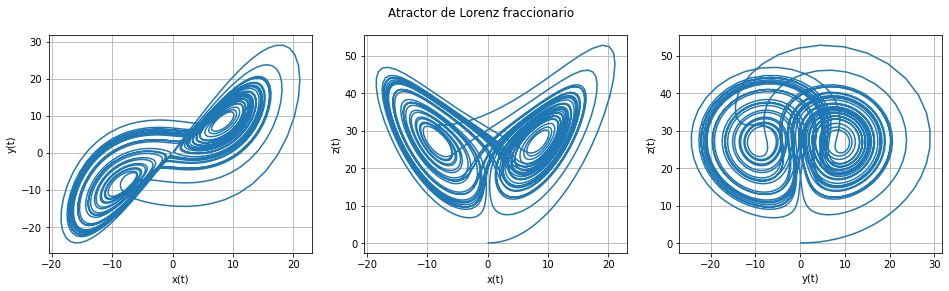

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.25))
fig.suptitle('Atractor de Lorenz fraccionario')

ax = fig.add_subplot(1, 3, 1)
ax.plot(x,y)
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.grid('on')

ax = fig.add_subplot(1, 3, 2)
ax.plot(x,z)
ax.set_xlabel('x(t)')
ax.set_ylabel('z(t)')
ax.grid('on')

ax = fig.add_subplot(1, 3, 3)
ax.plot(y, z)
ax.set_xlabel('y(t)')
ax.set_ylabel('z(t)')
ax.grid('on')

plt.show()

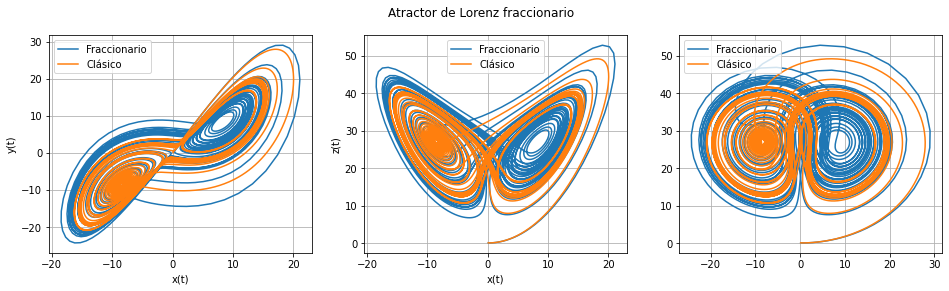

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.25))
fig.suptitle('Atractor de Lorenz fraccionario')

ax = fig.add_subplot(1, 3, 1)
ax.plot(x,y, label = 'Fraccionario')
ax.plot(xc,yc, label = 'Clásico')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.legend()
ax.grid('on')

ax = fig.add_subplot(1, 3, 2)
ax.plot(x,z, label = 'Fraccionario')
ax.plot(xc,zc, label = 'Clásico')
ax.set_xlabel('x(t)')
ax.set_ylabel('z(t)')
ax.legend()
ax.grid('on')

ax = fig.add_subplot(1, 3, 3)
ax.plot(y,z, label = 'Fraccionario')
ax.plot(yc,zc, label = 'Clásico')
ax.legend()
ax.grid('on')

plt.show()

---

# Referencias
* Li, C., & Zeng, F. (2015). *Numerical methods for fractional calculus* (Vol. 24). CRC Press.
* Hinsen, K. (2017). The Mittag-Leffler function in Python [Computer software]